# Practical 25

# Implement k-means clustering for obtaining optimal no.of clusters and their centroids on mall customers dataset

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\Machine Learning\Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x = df.iloc[:, [3,4]].values  #extract independent variables only

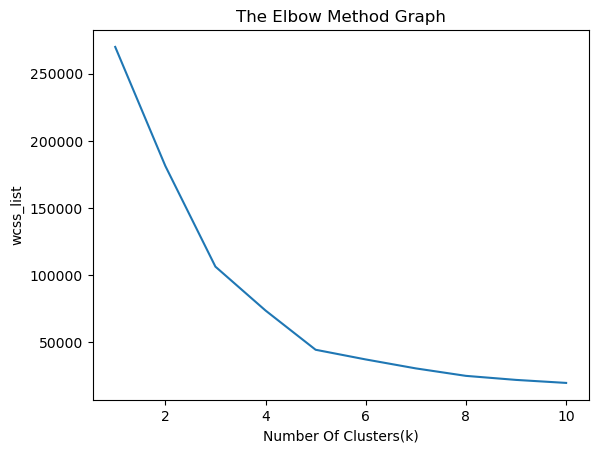

In [4]:
# Finding the optimal no. of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list = []  #initialising the list for the values of WCSS
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(1,11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number Of Clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()  #silhoutte curve

In [5]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss_list, curve = 'convex', direction = "decreasing")
kl.elbow

5

In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 1)  #Training the K-Means model on the dataset
y_predict = kmeans.fit_predict(x)

In [7]:
y_predict

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

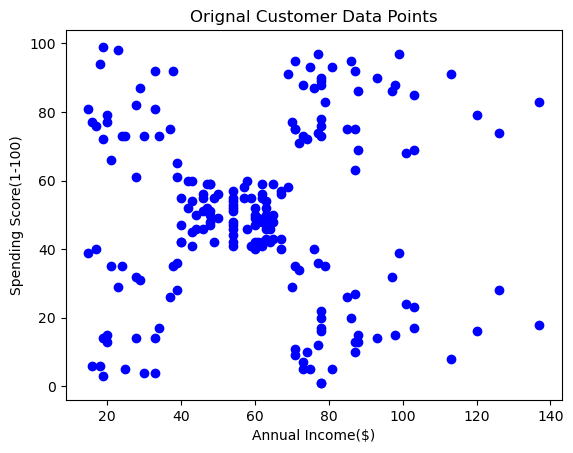

In [8]:
mtp.scatter(x[ : ,0], x[ : ,1], c = 'blue', label = 'All Data Points')
mtp.title('Orignal Customer Data Points')
mtp.xlabel('Annual Income($)')
mtp.ylabel('Spending Score(1-100)')
mtp.show()

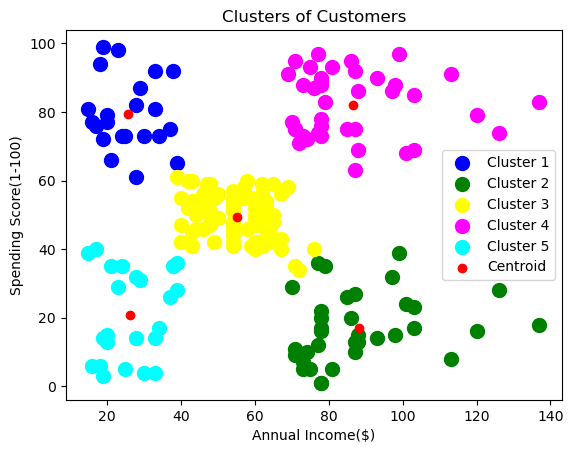

In [9]:
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  #first cluster
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  #second cluster
mtp.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')  #third cluster
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')  #fourth cluster
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')  #fifth cluster
mtp.scatter(kmeans.cluster_centers_[ : ,0],kmeans.cluster_centers_[ : ,1], c = 'red', label = 'Centroid')  #centroid
mtp.title('Clusters of Customers')
mtp.xlabel('Annual Income($)')
mtp.ylabel('Spending Score(1-100)')
mtp.legend()
mtp.show()

In [10]:
print(kmeans.cluster_centers_)  #Centers of the clusters

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]
